In [1]:
from data import *
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
# test_transform = T.Compose([
#     ToTensor(),
#     RandomVerticalFlip(0.4),
#     RandomHorizontalFlip(0.4),
#     RandomRot90(0.2),
#     RandomRotate(0.3, 30)
# ])
test_transform = T.Compose([ToTensor()])
test_dataset = CTSliceDataset('val', 128, transform=test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=1)

In [69]:
def patch(x, patch_factor):
    patch_size = (x.shape[-2] // patch_factor, x.shape[-1] // patch_factor)
    patched = torch.zeros((x.shape[0]*patch_factor**2,x.shape[1],*patch_size))
    for i in range(x.shape[0]): 
        j = 0
        for k in range(patch_factor**2):
            patch = (
                k % patch_factor * patch_size[0],
                k % patch_factor * patch_size[0] + patch_size[0],
                j * patch_size[1],
                j * patch_size[1] + patch_size[1]
            )
            patched[i+k*patch_factor**2] = x[i,0,patch[0]:patch[1],patch[2]:patch[3]]
            if (k + 1) % patch_factor == 0:
                j += 1
            if j == patch_factor:
                j = 0
    return patched


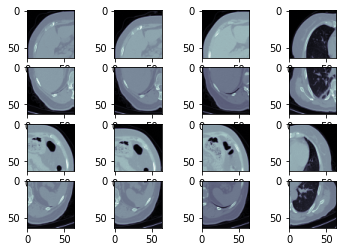

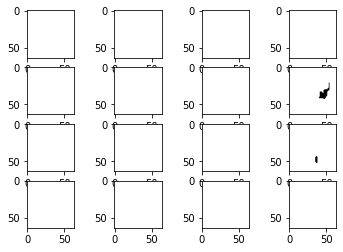

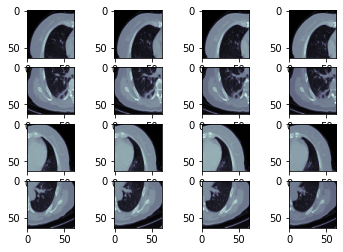

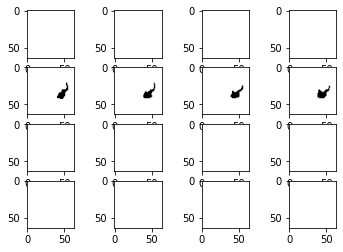

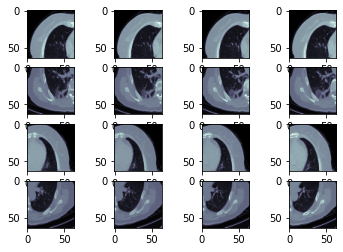

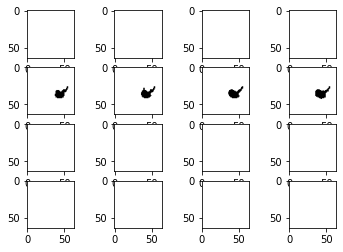

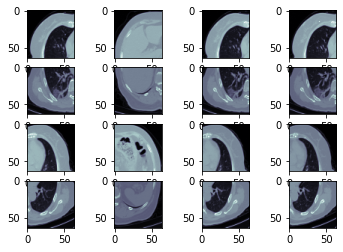

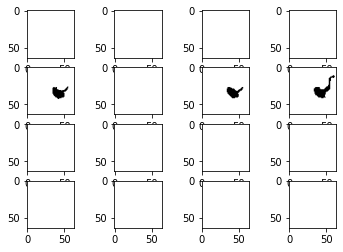

In [70]:
patch_factor = 2
for i, x in enumerate(test_dataloader):
    ct_image = x['ct_scan']
    inf_mask = x['inf']
    ct_image_patched = patch(ct_image, patch_factor)
    inf_mask_patched = patch(inf_mask, patch_factor)
    fig, axes = plt.subplots(ct_image.shape[0],patch_factor**2)
    for j, ax in enumerate(axes.flatten()):
        ax.imshow(ct_image_patched[j,0],cmap='bone')
    plt.show()
    fig, axes = plt.subplots(inf_mask.shape[0],patch_factor**2)
    for j, ax in enumerate(axes.flatten()):
        ax.imshow(inf_mask_patched[j,0],cmap='binary')
    plt.show()
    if i > 2:
        break
